In [ ]:
import matplotlib.pyplot as plt
import numpy as np

k = 4  # Number of categories
colors = plt.cm.get_cmap('hsv', k+1)

# Generate some random data and categories
np.random.seed(0)  # For reproducibility
x = np.random.randn(100)
y = np.random.randn(100)
categories = np.random.randint(0, k, 100)  # Assign one of k categories to each point

plt.scatter(x, y, c=categories, cmap=colors)
plt.colorbar()  # Show color scale
plt.show()

In [ ]:

# grid[1,0]=2
print(grid)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

grid = np.zeros((2, 3), dtype=int)
grid[0, 1] = 1  # Setting one cell to a different value
grid[0,2] = 2
grid[1,2] = 3
print(grid)
fig, ax = plt.subplots()

# Create a color map with k distinct colors
colors = plt.cm.get_cmap('hsv', 2)

# Plot the grid with explicit vmin and vmax to ensure the colormap covers the range of grid values
cax = ax.matshow(grid, cmap=colors, vmin=0, vmax=1)
ax.axis('off')  # Turn off the axis labels

# Adjust layout
ax.set_aspect("auto")

# Optional: Add a colorbar to illustrate the mapping from values to colors
plt.colorbar(cax)

plt.show()

    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Example grid
grid = np.array([[0, 1, 2],
                 [1, 2, 0],
                 [2, 0, 1]])

# Define your colors (e.g., for 3 distinct values)
colors = ['red', 'green', 'blue']  # RGB colors for values 0, 1, and 2
cmap = ListedColormap(colors)

# Plot the grid
fig, ax = plt.subplots()
cax = ax.matshow(grid, cmap=cmap)
ax.axis('off')
ax.set_aspect("auto")

# Optional: Add a colorbar to illustrate the mapping from values to colors
plt.colorbar(cax, ticks=[0, 1, 2])

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Example grid with k distinct values
k = 5  # Number of distinct values/colors
grid = np.random.randint(0, k, size=(10, 10))

# Create a colormap with k distinct colors
# 'tab10', 'tab20', 'Set3' are good choices for distinct colors, choose based on k
if k <= 10:
    cmap = plt.cm.get_cmap('tab10', k)
elif k <= 20:
    cmap = plt.cm.get_cmap('tab20', k)
else:
    cmap = plt.cm.get_cmap('Set3', k)  # Adjust accordingly if k > 20

# Normalize the grid values to match the colormap
norm = mcolors.Normalize(vmin=0, vmax=k-1)

# Create a ScalarMappable to map normalized values to colors
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # You need to set the array for the ScalarMappable

fig, ax = plt.subplots()

# Plot each cell with the color mapped from the value
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=sm.to_rgba(grid[i, j])))

ax.set_xlim(0, grid.shape[1])
ax.set_ylim(0, grid.shape[0])
ax.invert_yaxis()  # Invert y axis to have the origin at the top left corner
ax.axis('off')  # Turn off the axis

# Optional: Display a colorbar
plt.colorbar(sm, ticks=range(k), spacing='proportional', shrink=0.92, aspect=40, orientation='horizontal')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
def plot_grid_k_distinct_color(grid, k):
    
    if k <= 10:
        cmap = plt.cm.get_cmap('tab10', k)
    elif k <= 20:
        cmap = plt.cm.get_cmap('tab20', k)
    else:
        cmap = plt.cm.get_cmap('Set3', k)
    
    norm = mcolors.Normalize(vmin=0, vmax=k-1)
    
    fig, ax = plt.subplots()
    
    # Use imshow instead of manually plotting rectangles
    im = ax.imshow(grid, cmap=cmap, norm=norm)
    ax.axis('off')
    # Now, adding colorbar should work without issues
    plt.colorbar(im, ax=ax, ticks=range(k), spacing='proportional', shrink=0.92, aspect=40, orientation='horizontal')
    
    plt.show()


grid = np.zeros((2, 3), dtype=int)
grid[0, 1] = 1  # Setting one cell to a different value
grid[0,2] = 2
grid[1,2] = 3
print(grid)
plot_grid_k_distinct_color(grid,2, 3, 4)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the number of rows and columns for subplot grid
nrows, ncols = 2, 2

# Example data: list of grids with k distinct values
k = 5  # Number of distinct values/colors
grids = [np.random.randint(0, k, size=(10, 10)) for _ in range(nrows * ncols)]

# Create a colormap and normalization instance
cmap = plt.cm.get_cmap('tab10', k)  # Assuming k <= 10 for simplicity
norm = mcolors.Normalize(vmin=0, vmax=k-1)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

# Loop over all subplots to fill in the content
for i, ax in enumerate(axs.flatten()):
    # Select the corresponding grid data
    grid = grids[i]

    # Create an image display of the grid data
    im = ax.imshow(grid, cmap=cmap, norm=norm)

    # Optional: customize each subplot
    ax.set_title(f'Plot {i+1}')
    ax.axis('off')  # Hide the axes ticks and labels

# Adjust layout to prevent overlap
plt.tight_layout()

# Optional: Add a single colorbar for the entire figure, if appropriate
cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])  # Adjust as needed
fig.colorbar(im, cax=cbar_ax, ticks=range(k))

plt.show()


In [ ]:
def find_cells_with_zero_neighbor(grid):
    nrows, ncols = len(grid), len(grid[0]) if grid else 0
    result = []

    # Define neighbor offsets
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for row in range(nrows):
        for col in range(ncols):
            # Check each neighbor
            for dy, dx in neighbors:
                new_row, new_col = row + dy, col + dx
                # Check if the neighbor is within grid bounds
                if 0 <= new_row < nrows and 0 <= new_col < ncols:
                    # If neighbor's value is zero, add the cell to the result
                    if grid[new_row][new_col] == 0:
                        result.append((row, col))
                        break  # No need to check other neighbors

    return result

# Example grid
grid = [
    [1, 2, 3],
    [4, 0, 6],
    [7, 8, 9]
]

# Get the subset of cells
subset = find_cells_with_zero_neighbor(grid)
print(subset)


In [ ]:
def has_neighbor_zero(grid, row, col):
    nrows, ncols = len(grid), len(grid[0])
    # Define relative positions of neighbors (up, down, left, right)
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dy, dx in neighbors:
        new_row, new_col = row + dy, col + dx
        if 0 <= new_row < nrows and 0 <= new_col < ncols and grid[new_row][new_col] == 0:
            return True
    return False
grid = [
    [1, 2, 0, 4],
    [5, 6, 7, 8],
    [9, 0, 11, 12],
    [13, 0, 15, 16]
]

import random
subset_cells = [(row, col) for row in range(len(grid)) for col in range(len(grid[0])) if has_neighbor_zero(grid, row, col)]
subset_cells_nonzero = [(row, col) for row in range(len(grid)) for col in range(len(grid[0])) if has_neighbor_zero(grid, row, col) and grid[row][col] !=0 ]
cell = tuple(subset_cells_nonzero[random.randint(0, len(subset_cells_nonzero) - 1)])
print(f'{subset_cells}, \n{subset_cells_nonzero}')
print(cell)

from PIL import ImageCreating a grid of images with intervals (or padding) between them can be done efficiently using Python, particularly with libraries such as Pillow (PIL). The idea is to create a new, larger image that will serve as the canvas for your grid. Then, you place each of your 27 images onto this canvas at the correct positions, accounting for the desired intervals between them.

Let's assume you want to create a 3x9 grid (3 rows and 9 columns) as an example, with a specific padding size between images. Here's a step-by-step guide on how to do this:

Install Pillow: First, ensure you have Pillow installed in your environment. If not, you can install it using pip:
1. Load the Images: Load all the images from the directory into a list.

2. Calculate Canvas Size: Determine the size of the final image (canvas) by taking the size of one image and accounting for the intervals and the number of images per row and column.

3. Create the Canvas: Create a new, blank image with the calculated size.

4. Place the Images on the Canvas: Iterate over your images and paste them into the correct positions on the canvas, adding the interval as necessary.

Here is a complete example code snippet:

In [ ]:
from PIL import Image
import os

from PIL import Image
import os

# Parameters
directory = 'F:\\2023\\dev\\pythonProject1'
interval = 5  # Space between images
grid_size = (9, 3)  # Grid size as (columns, rows)

# Load all images
images = [Image.open(os.path.join(directory, f)) for f in os.listdir(directory) if f.endswith('.png')]
if not images:
    raise ValueError("No PNG images found in the directory.")

# Assume all images are the same size
image_width, image_height = images[0].size

# Calculate total grid size
total_width = (image_width * grid_size[0]) + (interval * (grid_size[0] - 1))
total_height = (image_height * grid_size[1]) + (interval * (grid_size[1] - 1))

# Create a new image with a white background
grid_image = Image.new('RGB', (total_width, total_height), 'white')

# Paste images into the grid
for index, image in enumerate(images):
    column = index % grid_size[0]
    row = index // grid_size[0]
    x = column * (image_width + interval)
    y = row * (image_height + interval)
    grid_image.paste(image, (x, y))

# Save or show the grid image
grid_image_path = 'F:\\2023\\dev\\pythonProject1\\grid_img.png'
grid_image.save(grid_image_path)
# Or display it directly if you're using a Jupyter notebook
# grid_image.show()



In [ ]:
from PIL import Image
import os

# Parameters
directory ='F:\\2023\\dev\\pythonProject1\\initialize'
interval = 5  # Space between images
grid_size = (9, 3)  # Grid size as (columns, rows)

# Get all PNG filenames in the directory and sort them
filenames = sorted([f for f in os.listdir(directory) if f.endswith('.png')])

# Load images in sorted order
images = [Image.open(os.path.join(directory, filename)) for filename in filenames]

if not images:
    raise ValueError("No PNG images found in the directory.")

# Assume all images are the same size
image_width, image_height = images[0].size

# Calculate total grid size
total_width = (image_width * grid_size[0]) + (interval * (grid_size[0] - 1))
total_height = (image_height * grid_size[1]) + (interval * (grid_size[1] - 1))

# Create a new image with a white background
grid_image = Image.new('RGB', (total_width, total_height), 'white')

# Paste images into the grid
for index, image in enumerate(images):
    column = index % grid_size[0]
    row = index // grid_size[0]
    x = column * (image_width + interval)
    y = row * (image_height + interval)
    grid_image.paste(image, (x, y))

# Save or show the grid image
grid_image_path = 'F:\\2023\\dev\\pythonProject1\\initialize\\grid_img.png'
grid_image.save(grid_image_path)
# Or display it directly if you're using a Jupyter notebook
# grid_image.show()


In [ ]:
import os
import re

# Directory containing the files to be renamed
directory = 'F:\\2023\\dev\\pythonProject1'

# Regular expression to match filenames like 'step_1.png' but not 'step_10.png'
regex = r'step_(\d)\.png'

# Function to replace the match with zero-padded number
def replace_with_zero_padded(match):
    return f'step_0{match.group(1)}.png'

# Iterate over all files in the directory
for filename in os.listdir(directory):
    # Check if the filename matches the pattern
    new_filename = re.sub(regex, replace_with_zero_padded, filename)
    if new_filename != filename:
        # Full path for current and new filenames
        old_file_path = os.path.join(directory, filename)
        new_file_path = os.path.join(directory, new_filename)
        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f'Renamed "{filename}" to "{new_filename}"')


In [ ]:
from PIL import Image
import os


# Parameters
directory ='F:\\2023\\dev\\pythonProject1\\initialize'
interval = 5  # Space between images
grid_size = (9, 3)  # Grid size as (columns, rows)

# Get all PNG filenames in the directory and sort them
filenames = sorted([f for f in os.listdir(directory) if f.endswith('.png')])

# Load images in sorted order
images = [Image.open(os.path.join(directory, filename)) for filename in filenames]

if not images:
    raise ValueError("No PNG images found in the directory.")

# Assume all images are the same size
image_width, image_height = images[0].size

# Calculate total grid size
total_width = (image_width * grid_size[0]) + (interval * (grid_size[0] - 1))
total_height = (image_height * grid_size[1]) + (interval * (grid_size[1] - 1))

# Create a new image with a white background
grid_image = Image.new('RGB', (total_width, total_height), 'white')

# Paste images into the grid
for index, image in enumerate(images):
    column = index % grid_size[0]
    row = index // grid_size[0]
    x = column * (image_width + interval)
    y = row * (image_height + interval)
    grid_image.paste(image, (x, y))

# Save or show the grid image
grid_image_path = 'F:\\2023\\dev\\pythonProject1\\initialize\\grid_img.png'
grid_image.save(grid_image_path)


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt 
def create_adjacent_colored_grid(m, n, k):
    """
    Creates a grid of size m x n, with adjacent cells grouped together with k different colors.
    
    Parameters:
    - m (int): The number of rows in the grid.
    - n (int): The number of columns in the grid.
    - k (int): The number of color groups to be formed.

    Returns:
    - A matplotlib plot of the grid with adjacent cells colored the same.
    """
    # Create an m x n grid initialized with zeros
    grid = np.zeros((m, n), dtype=int)

    # Initialize the grid with k different colors randomly
    for i in range(k):
        # Choose a random cell that is not already colored (not zero)
        cell = (random.randint(0, m-1), random.randint(0, n-1))
        while grid[cell] != 0:
            cell = (random.randint(0, m-1), random.randint(0, n-1))
        grid[cell] = i + 1  # Set to a new color

    # Create a list of offsets to look for adjacent cells
    adjacent_offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    # Randomly choose cells to color until all cells are filled
    while np.any(grid == 0):
        # Randomly choose a cell that is already colored
        colored_cells = np.argwhere(grid != 0)
        cell = tuple(colored_cells[random.randint(0, len(colored_cells) - 1)])

        # Randomly choose an adjacent cell to color
        random.shuffle(adjacent_offsets)
        for offset in adjacent_offsets:
            adjacent_cell = (cell[0] + offset[0], cell[1] + offset[1])
            # Check if the adjacent cell is within the grid and not already colored
            if (0 <= adjacent_cell[0] < m) and (0 <= adjacent_cell[1] < n) and grid[adjacent_cell] == 0:
                # Color the adjacent cell with the same color as the current cell
                grid[adjacent_cell] = grid[cell]
                break

    # Create a color map with k distinct colors
    colors = plt.cm.get_cmap('hsv', k+1)

    # Plot the grid
    plt.figure(figsize=(n, m))
    plt.matshow(grid, cmap=colors)
    plt.colorbar()

    # Turn off the axis labels
    plt.axis('off')
    
    # Display the plot
    plt.show()

# Example usage:
m = 10  # Number of rows
n = 15  # Number of columns
k = 5   # Number of color groups

create_adjacent_colored_grid(m, n, k)


In [ ]:
# grid_creation.py
import numpy as np
import random

def create_adjacent_colored_grid(m, n, k):
    """
    Creates a grid of size m x n, with adjacent cells grouped together with k different colors.
    """
    grid = np.zeros((m, n), dtype=int)

    for i in range(k):
        cell = (random.randint(0, m-1), random.randint(0, n-1))
        while grid[cell] != 0:
            cell = (random.randint(0, m-1), random.randint(0, n-1))
        grid[cell] = i + 1

    adjacent_offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while np.any(grid == 0):
        colored_cells = np.argwhere(grid != 0)
        cell = tuple(colored_cells[random.randint(0, len(colored_cells) - 1)])

        random.shuffle(adjacent_offsets)
        for offset in adjacent_offsets:
            adjacent_cell = (cell[0] + offset[0], cell[1] + offset[1])
            if (0 <= adjacent_cell[0] < m) and (0 <= adjacent_cell[1] < n) and grid[adjacent_cell] == 0:
                grid[adjacent_cell] = grid[cell]
                break

    return grid


In [ ]:
# grid_plotting.py
import matplotlib.pyplot as plt

def plot_grid(grid, k):
    """
    Plots a given grid with k different colors.
    """
    colors = plt.cm.get_cmap('hsv', k+1)
    plt.figure(figsize=(grid.shape[1], grid.shape[0]))
    plt.matshow(grid, cmap=colors)
    plt.colorbar()
    plt.axis('off')
    plt.show()


In [ ]:
# example_usage.py
#from grid_creation import create_adjacent_colored_grid
#from grid_plotting import plot_grid

m = 10  # Number of rows
n = 15  # Number of columns
k = 5   # Number of color groups

grid = create_adjacent_colored_grid(m, n, k)
plot_grid(grid, k)


In [ ]:
import matplotlib.pyplot as plt

def plot_grids(m, n, k, rows, cols):
    """
    Creates a plot with multiple subplots arranged in specified rows and columns, each displaying a grid.
    
    Parameters:
    - m (int): The number of rows in each grid.
    - n (int): The number of columns in each grid.
    - k (int): The number of color groups in each grid.
    - rows (int): The number of subplot rows.
    - cols (int): The number of subplot columns.
    """
    fig, axes = plt.subplots(rows, cols, figsize=(n*cols, m*rows))
    for i in range(rows):
        for j in range(cols):
            grid = create_adjacent_colored_grid(m, n, k)
            colors = plt.cm.get_cmap('hsv', k+1)
            if rows == 1 or cols == 1:  # Handling the case of a single row or column of subplots
                ax = axes[max(i, j)]
            else:
                ax = axes[i, j]
            ax.matshow(grid, cmap=colors)
            ax.axis('off')
    plotfilename = create
    plt.savefig('grids')
    plt.show()
plot_grids(m=10, n=15, k=5, rows=2, cols=4)


In [ ]:
m, n =2, 5
[(x, y) for x in range(m) for y in range(n)]


In [ ]:
import numpy as np

grid = np.array([
 [3, 3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3, 3],
 [1, 3, 3, 1, 3, 3],
 [1, 3, 1, 1, 2, 2],
 [1, 1, 1, 1, 2, 2]]

)
import math
def calculate_simplicity(grid):
    # Find unique colors
    unique_colors = np.unique(grid)
    
    simplicity_scores = {}
    
    for color in unique_colors:
        # Find cells of the current color
        color_cells = np.argwhere(grid == color)
        
        # Calculate area as the number of cells
        area = len(color_cells)
        
        # Calculate perimeter
        perimeter = 0
        for cell in color_cells:
            x, y = cell
            # Check all four neighbors
            neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
            for nx, ny in neighbors:
                if nx < 0 or nx >= grid.shape[0] or ny < 0 or ny >= grid.shape[1] or grid[nx, ny] != color:
                    perimeter += 1
        
        # Calculate simplicity as area/perimeter
        
        simplicity = area / perimeter if perimeter > 0 else 0
        simplicity =   (16* area) / math.pow(perimeter,2) if perimeter > 0 else 0
        simplicity_scores[color] = simplicity
        print(f'color={color}, perimeter={perimeter}, area={area}')
    return simplicity_scores

simplicity_scores = calculate_simplicity(grid)
for color, simplicity in simplicity_scores.items():
    print(f"Color {color}: Simplicity = {simplicity:.2f}")


In [ ]:
|math.pow(14,2) / (16* 7) 

In [ ]:
import math
math.pow(3,2)

In [113]:
def count_neighbors(grid):
    # 그리드의 행과 열의 크기를 가져옵니다.
    rows, cols = len(grid), len(grid[0])
    
    # 이웃을 확인할 8가지 방향을 정의합니다. (상, 하, 좌, 우, 대각선 4방향)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    # 결과를 저장할 리스트를 초기화합니다.
    neighbor_count = [[0 for _ in range(cols)] for _ in range(rows)]
    
    # 그리드의 각 셀을 순회하며 이웃을 세어줍니다.
    for row in range(rows):
        for col in range(cols):
            # 현재 셀의 값(색)을 가져옵니다.
            current_value = grid[row][col]
            # 이웃의 수를 세기 위한 카운터를 초기화합니다.
            count = 0
            for d in directions:
                # 이웃 셀의 위치를 계산합니다.
                nr, nc = row + d[0], col + d[1]
                # 이웃 셀이 그리드 범위 내에 있고, 같은 색(값)인지 확인합니다.
                if 0 <= nr < rows and 0 <= nc < cols and grid[nr][nc] == current_value:
                    count += 1
            # 계산된 이웃의 수를 결과 리스트에 저장합니다.
            neighbor_count[row][col] = count
    
    return neighbor_count

# 주어진 그리드
grid = [[3, 3, 3, 1, 1],
        [3, 3, 2, 1, 1],
        [3, 2, 2, 1, 1]]

# 같은 색의 이웃 개수를 세어 출력합니다.
neighbor_counts = count_neighbors(grid)
for row in neighbor_counts:
    print(row)


[2, 3, 1, 2, 2]
[3, 2, 1, 3, 3]
[1, 1, 2, 2, 2]


In [ ]:
def count_different_color_neighbors(grid):
    # 그리드의 행과 열의 크기를 가져옵니다.
    rows, cols = len(grid), len(grid[0])
    
    # 상, 하, 좌, 우 방향 정의
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    # 결과를 저장할 리스트를 초기화합니다.
    different_neighbor_count = [[0 for _ in range(cols)] for _ in range(rows)]
    
    # 그리드의 각 셀을 순회합니다.
    for row in range(rows):
        for col in range(cols):
            # 현재 셀의 색깔을 가져옵니다.
            current_color = grid[row][col]
            # 다른 색의 이웃을 세기 위한 카운터
            count = 0
            for d in directions:
                # 이웃 셀의 위치를 계산합니다.
                nr, nc = row + d[0], col + d[1]
                # 이웃 셀이 그리드 범위 내에 있고, 현재 셀과 색깔이 다른지 확인합니다.
                if 0 <= nr < rows and 0 <= nc < cols and grid[nr][nc] != current_color:
                    count += 1
            # 계산된 다른 색의 이웃의 수를 결과 리스트에 저장합니다.
            different_neighbor_count[row][col] = count
    
    return different_neighbor_count

# 주어진 그리드
grid = [[3, 3, 3, 1, 1],
        [3, 3, 2, 1, 1],
        [3, 2, 2, 1, 1]]

# 자기 자신과 색깔이 다른 이웃의 개수를 세어 출력합니다.
different_neighbor_counts = count_different_color_neighbors(grid)
for row in different_neighbor_counts:
    print(row)


In [ ]:
grid = [[1, 1, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 3, 2]]

In [ ]:
different_neighbor_counts = count_different_color_neighbors(grid)
for row in different_neighbor_counts:
    print(row)

In [ ]:
# mutate function
import random
import copy

def find_and_change_color(grid):
    # 자기 자신과 색깔이 다른 이웃의 개수를 계산합니다.
    different_neighbor_counts = count_different_color_neighbors(grid)
    print(f'sum of diff={sum(sum(row) for row in different_neighbor_counts)}')
    rows, cols = len(grid), len(grid[0])
    # 상, 하, 좌, 우 방향 정의
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    new_grid = copy.deepcopy(grid)

    # 3, 2, 1 순으로 조건에 맞는 셀 찾기
    for target_count in [3, 2, 1]:
        for row in range(rows):
            for col in range(cols):
                if different_neighbor_counts[row][col] == target_count:
                    current_color = new_grid[row][col]
                    # 조건에 맞는 셀의 이웃 중 색깔이 다른 이웃을 찾습니다.
                    different_color_neighbors = []
                    for d in directions:
                        nr, nc = row + d[0], col + d[1]
                        if 0 <= nr < rows and 0 <= nc < cols and new_grid[nr][nc] != current_color:
                            different_color_neighbors.append((nr, nc))
                    # 이웃 중 하나를 임의로 선택하여 색깔 변경
                    if different_color_neighbors:
                        nr, nc = random.choice(different_color_neighbors)
                        # 선택된 이웃의 색깔을 현재 셀의 색깔로 변경
                        new_grid[nr][nc] = current_color
                        return new_grid  # 변경 후 그리드 반환

    return new_grid  # 조건에 맞는 셀이 없는 경우 원본 그리드 반환

# 주어진 그리드
grid = [[3, 3, 3, 1, 1],
        [3, 3, 2, 1, 1],
        [3, 2, 2, 1, 1]]

# 함수 실행
new_grid = find_and_change_color(grid)

# 변경된 그리드 출력
for row in new_grid:
    print(row)


In [ ]:
new_grid = find_and_change_color(grid)

# 변경된 그리드 출력
for row in new_grid:
    print(row)


In [76]:
import matplotlib as mpl
def plot_grid_single(grid, name='temp.png'):
    plt.figure()
    colors = mpl.colormaps['Accent']
    plt.matshow(grid, cmap=colors)
    plt.axis('off')
    plt.savefig(name)
    plt.show()

# This is Final Fitness Function For Simplicity
함수 내에서 내에서 유사한 색상의 셀이 많을수록, 즉 색상 변화가 적을수록 높은 값을 반환한다는 개념

In [108]:
def calculate_simplicity_score(matrix):
    # 각 값의 개수를 저장할 딕셔너리
    counts = {0: 0, 1: 0, 2: 0, 3:0, 4:0}
    
    # 매트리스의 각 셀 값을 순회하며 개수를 센다
    for row in matrix:
        for cell in row:
            if cell in counts:
                counts[cell] += 1
    
    # 수정된 가중치 설정
    weights = {0: 100, 1:50, 2: 25, 3:12, 4:0}
    
    # 총 가치 계산
    total_value = sum(counts[value] * weights[value] for value in counts)
    simplicity_fitness = total_value// (len(matrix) *len(matrix[1]))
    return simplicity_fitness

# count_different_color_neighbors(grid)로부터 얻은 매트리스 예시
matrix =  [[0, 0, 2, 1, 0], 
           [0, 2, 3, 1, 0], 
           [1, 2, 1, 1, 0]]
# 매트리스의 특징을 파악하는 스칼라 값 계산
scalar_value = calculate_simplicity_score(matrix)
print(scalar_value)


62


In [107]:
matrix =  [[0, 0, 0, 0, 0], 
           [1, 1, 1, 0, 0], 
           [0, 0, 0, 0, 0]]

# 매트리스의 특징을 파악하는 스칼라 값 계산
scalar_value = calculate_diversity_score(matrix) 
print(scalar_value)

90


<Figure size 640x480 with 0 Axes>

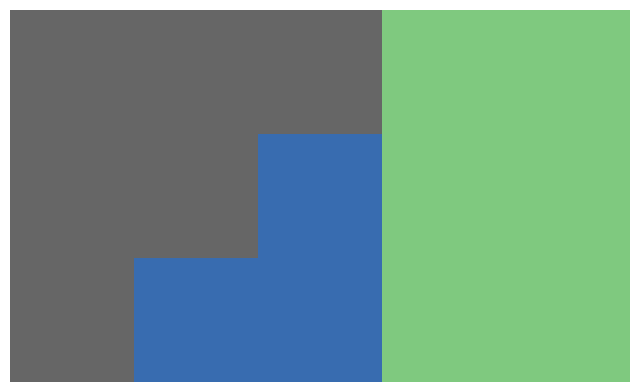

counts = [[0, 0, 2, 1, 0], [0, 2, 3, 1, 0], [1, 2, 1, 1, 0]]
fit = 62
new_grid

sum of diff=14
count_grid = [[0, 0, 2, 2, 0], [0, 2, 2, 3, 1], [1, 2, 1, 2, 0]]
fit = 54


<Figure size 640x480 with 0 Axes>

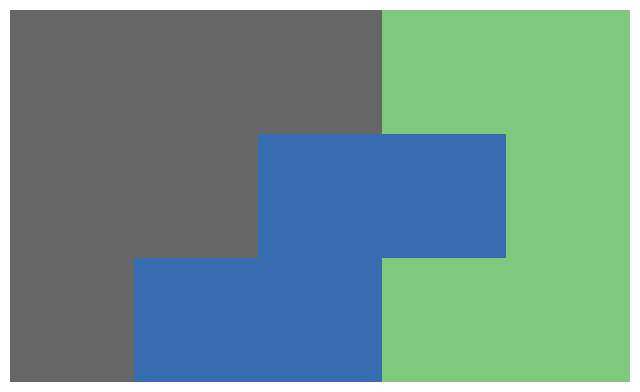

sum of diff=14
count_grid = [[0, 1, 2, 1, 0], [0, 2, 2, 1, 0], [1, 2, 1, 1, 0]]
fit = 60


<Figure size 640x480 with 0 Axes>

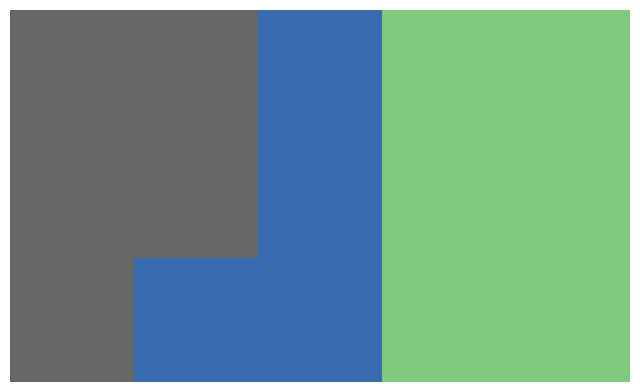

sum of diff=14
count_grid = [[0, 1, 2, 1, 0], [1, 2, 2, 1, 0], [1, 1, 1, 1, 0]]
fit = 58


<Figure size 640x480 with 0 Axes>

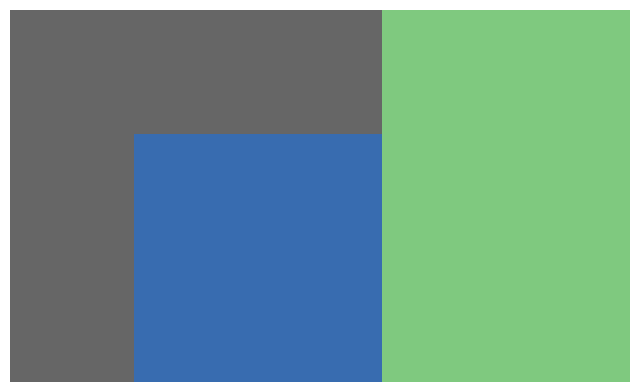

sum of diff=14
count_grid = [[0, 1, 2, 1, 0], [0, 2, 2, 1, 0], [1, 2, 1, 1, 0]]
fit = 60


<Figure size 640x480 with 0 Axes>

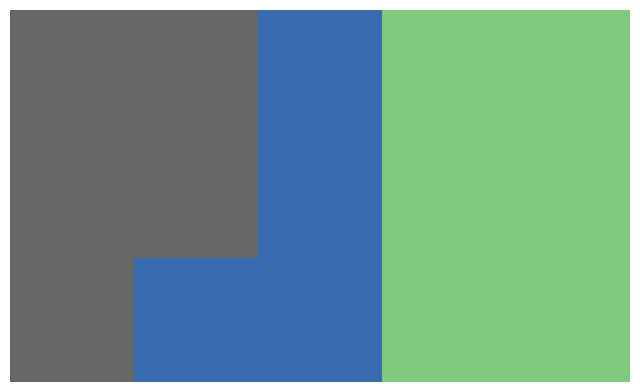

sum of diff=14
count_grid = [[0, 0, 2, 2, 0], [0, 2, 2, 3, 1], [1, 2, 1, 2, 0]]
fit = 54


<Figure size 640x480 with 0 Axes>

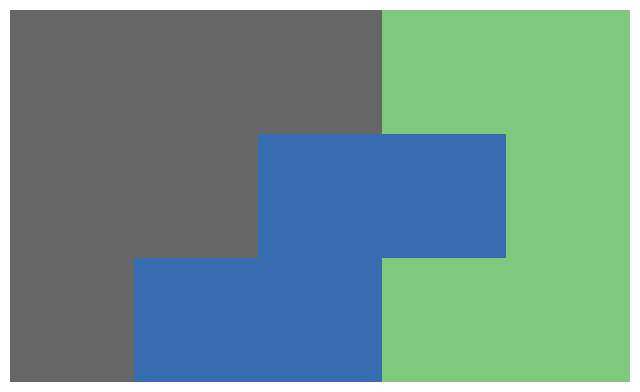

In [112]:


import random
import copy

def find_and_change_color(grid):
    # 자기 자신과 색깔이 다른 이웃의 개수를 계산합니다.
    different_neighbor_counts = count_different_color_neighbors(grid)
    print(f'sum of diff={sum(sum(row) for row in different_neighbor_counts)}')
    rows, cols = len(grid), len(grid[0])
    # 상, 하, 좌, 우 방향 정의
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    new_grid = copy.deepcopy(grid)

    # 3, 2, 1 순으로 조건에 맞는 셀 찾기
    for target_count in [3, 2, 1]:
        for row in range(rows):
            for col in range(cols):
                if different_neighbor_counts[row][col] == target_count:
                    current_color = new_grid[row][col]
                    # 조건에 맞는 셀의 이웃 중 색깔이 다른 이웃을 찾습니다.
                    different_color_neighbors = []
                    for d in directions:
                        nr, nc = row + d[0], col + d[1]
                        if 0 <= nr < rows and 0 <= nc < cols and new_grid[nr][nc] != current_color:
                            different_color_neighbors.append((nr, nc))
                    # 이웃 중 하나를 임의로 선택하여 색깔 변경
                    if different_color_neighbors:
                        nr, nc = random.choice(different_color_neighbors)
                        # 선택된 이웃의 색깔을 현재 셀의 색깔로 변경
                        new_grid[nr][nc] = current_color
                        return new_grid  # 변경 후 그리드 반환

    return new_grid  # 조건에 맞는 셀이 없는 경우 원본 그리드 반환

def calculate_simplicity_score(matrix):
    # 각 값의 개수를 저장할 딕셔너리
    counts = {0: 0, 1: 0, 2: 0, 3:0, 4:0}
    
    # 매트리스의 각 셀 값을 순회하며 개수를 센다
    for row in matrix:
        for cell in row:
            if cell in counts:
                counts[cell] += 1
    
    # 수정된 가중치 설정
    weights = {0: 100, 1:50, 2: 25, 3:12, 4:0}
    
    # 총 가치 계산
    total_value = sum(counts[value] * weights[value] for value in counts)
    simplicity_fitness = total_value// (len(matrix) *len(matrix[1]))
    return simplicity_fitness

def module_main():
    grid = np.array([
        [3, 3, 3, 1, 1],
        [3, 3, 2, 1, 1],
        [3, 2, 2, 1, 1]])
    plot_grid_single(grid)
    count_grid = count_different_color_neighbors(grid)
    fit = calculate_simplicity_score(count_grid)
    
    print(f'counts = {count_grid}')
    print(f'fit = {fit}')
    print('new_grid\n')
    for i in range(5):
        new_grid = find_and_change_color(grid)
        count_grid = count_different_color_neighbors(new_grid)
        print(f'count_grid = {count_grid}')
        new_fit = calculate_simplicity_score(count_grid)
        print(f'fit = {new_fit}')
        print('\n')
        
        plot_grid_single(new_grid)

module_main()    

